# The Question

> TEST YOUR INTUITION!! You are a development team lead for a contractor. A new project has come in that you have to cost for your sales team based on hours worked. There are 50 features. Each feature will take 10 hours. The naive estimate is too easy right!? ... WAIT theres more! Each feature will take 100 lines of code and you KNOW that you will have 0.1 bugs per line. Don't panic, you know that each bug will take only 2 hours to fix .. just also consider that every bug will constitute 5 new lines of code and there will be bugs in them too. So, QUESTION: how long before the product is actually pristine? Give your answer in either hours or multiples of the naive estimate.

# Answer

Lets do the workings in a table first.

| **Task**             | **Number to do** | **Cost** | **Number of lines to write** |
| -------------------- | ---------------- | -------- | ---------------------------- |
| **Initial Features** | 50               | 500      | 5000                         |
| **Bugs Round 1**     | 500              | 1000     | 2500                         |
| **Bugs Round 2**     | 250              | 500      | 1250                         |
| **Bugs Round 3**     | 125              | 250      | 625                          |
| **Bugs Round 4**     | 62.5             | 125      | 312.5                        |
| **Bugs Round 5**     | 31.25            | 62.5     | 156.25                       |
| **Bugs Round 6**     | 15.625           | 31.25    | 78.125                       |
| **Bugs Round 7**     | 7.8125           | 15.625   | 39.0625                      |
| **Bugs Round 8**     | 3.90625          | 7.8125   | 19.53125                     |
| **Bugs Round 9**     | 1.953125         | 3.90625  | 9.765625                     |
| .. | .. | .. | .. | .. |
| **TOTAL**     |         |  2500 |                     |


The table shows doing the initial features is the easy part. The first round of bug fixes costs more than the initial features!! In total there is 5 times the work of the initial features alone. 


# Maths Stuff

The full calculation involves an infinite sum. It should be intuitive that if each bug fix itself creates one or more bugs then that sum will never converge. In our case each bug fix only creates 0.1 * 5 bugs so it does converge. In the table above, after the 9th round of bug fixes less than one whole bug is created so we stop there but the whole sum can be computed by the method given below. 

### Converging Sum
If 'bugs per lines' multiplied by 'lines per bug fix' is less than one we can calculate the convergence of the sum as follows (per any convergent geometric series):

$ TOTAL = a + A / (1 - B) $

where:
- a = number of features x hours per feature
- A = hours per bug x number of features x lines per feature x bugs per line
- B = lines per bug x bugs per line

The numbers we chose for the variables are probably a bit unrealistic so it would be interesting to understand how the outcome varies with variation in the parameters.

At the time of publishing there is an interactive version of this article at [heroku](https://evening-beyond-80526.herokuapp.com/) where you can set values for all the variables. If you are reading the blog article, below there are several charts with varying hours per bug and lines per bug (all basically the same chart with different scales).

The source code for this article is available at [github](https://github.com/hugoleeney/jupyter_notebooks/blob/main/Dev/Buggy%20Project%20Estimate.ipynb).

In [4]:


def g(numfeatures, hrsperfeature, linesperfeature, hrsperbug, bugsperline, linesperbug):
    a = numfeatures*hrsperfeature
    A = hrsperbug*numfeatures*linesperfeature*bugsperline
    B = linesperbug*bugsperline
    return a+A/(1-B)

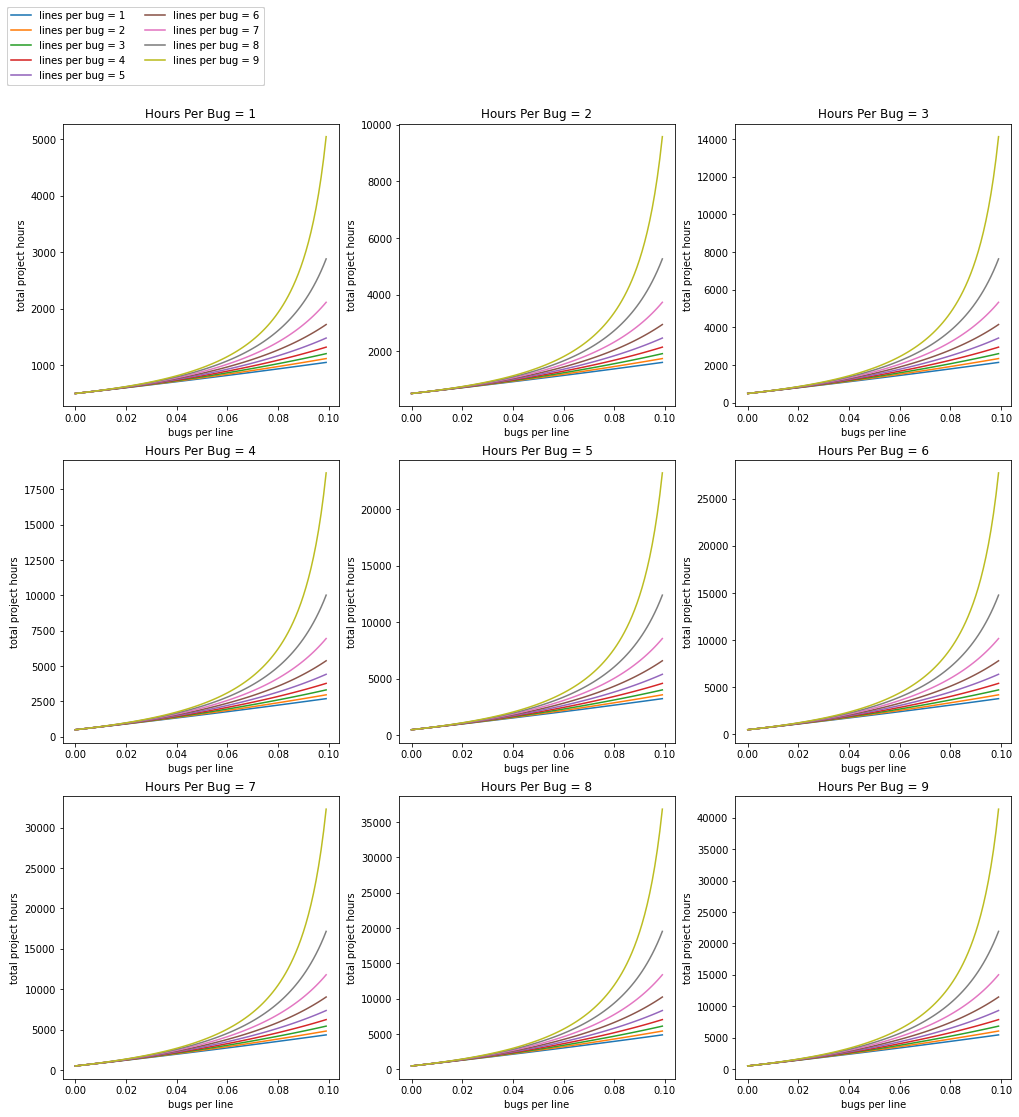

In [27]:
fig, ax = plt.subplots(3, 3, constrained_layout=True, figsize=(14,14))


linesperbugs = [1,2,3,4,5,6,7,8,9]

hrsperbugs = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

numfeatures = 50
hrsperfeature = 10
linesperfeature = 100

x_s = [x/1000 for x in range(100)]

for i in range(3):
    for j in range(3):
        if not len(hrsperbugs[i]) > j:
            break
        hrsperbug = hrsperbugs[i][j]
        ax[i,j].set_title(f"Hours Per Bug = {hrsperbug}")
        ax[i,j].set_xlabel('bugs per line')
        ax[i,j].set_ylabel('total project hours')
        lines = []
        for linesperbug in linesperbugs:
            y_s = [g(numfeatures, hrsperfeature, linesperfeature, hrsperbug, x, linesperbug) for x in x_s]

            # ax[i,j].set_ylim((0,2000000))
            line = ax[i,j].plot(x_s, y_s)
            lines.append(line)
        # print([f"lines per bug = {x}" for x in linesperbugs])
        fig.legend([f"lines per bug = {x}" for x in linesperbugs], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, borderaxespad=0.)
        

plt.show()
